#Final Exam Dataset #1:  Diamond Price Prediction

This is a dataset with information on about 60 thousand diamonds.

Your goal is to develop a model that takes attributes of a diamond as input,
and produces a prediction about the price of the diamond as output.

Specifically: <b>develop a model that predicts WHETHER THE PRICE OF A GIVEN DIAMOND WILL BE GREATER THAN &dollar;1500</b>.  (Your prediction will be <b>0</b> if the price is below &dollar;1500,
and <b>1</b> if the price is above &dollar;1500.)

About 20 thousand have a price below &dollar;1500, and the remaining diamonds have a price above.
Thus a simple model that always predicts high prices
might be right about 2/3 of the time.
Your job is to do better than this baseline rate.

More accurate statistics about columns of the dataset
are included at the end of this notebook.


##Schema of the Dataset

The dataset has the following columns:
<table>
<tr><td>   <b>Carat</b></td><td>weight of the diamond in carats, rounded to an integer  (1 carat = 0.2 grams)</td></tr>
<tr><td>   <b>Cut</b></td><td>quality of the cut  {Fair, Good, VeryGood, Premium, Ideal}</td></tr>
<tr><td>   <b>Color</b></td><td>color code: &lbrace; D &gt; E &gt; F &gt; G &gt; H &gt; I &gt; J &rbrace;  (J is worst, D is best)</td></tr>
<tr><td>   <b>Clarity</b></td><td>clarity code: &lbrace; I1 &lt; SI1 &lt; SI2 &lt; VS1 &lt; VS2 &lt; VVS1 &lt; VVS2 &lt; IF &rbrace; (I1 is worst, IF is best)</td></tr>

<tr><td>   <b>x</b></td><td>Length in mm (numeric value between 0 and 6)</td></tr>
<tr><td>   <b>y</b></td><td>Width  in mm (numeric value between 0 and 9)</td></tr>
<tr><td>   <b>z</b></td><td>Depth  in mm (numeric value between 0 and 6)</td></tr>

<tr><td>   <b>Depth</b></td><td>total depth percentage  =  2*z/(x+y)</td></tr>
<tr><td>   <b>Table</b></td><td>width of top of diamond relative to widest point</td></tr>

<tr><td>   <b>Price</b></td><td>in US dollars</td></tr>

</table>

##Caution

The datset has skewed distributions.  Please check below.


#A First Look at the Dataset

In [1]:
import pandas as pd
import numpy as np

Diamonds = pd.DataFrame.from_csv('Diamonds.csv').reset_index()

Diamonds.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [2]:
Diamonds.shape

(53931, 10)

In [3]:
diamond_prices = Diamonds[['Price']].values

lowest = np.min(diamond_prices)
highest = np.max(diamond_prices)

print( (lowest, highest) )

(326, 18823)


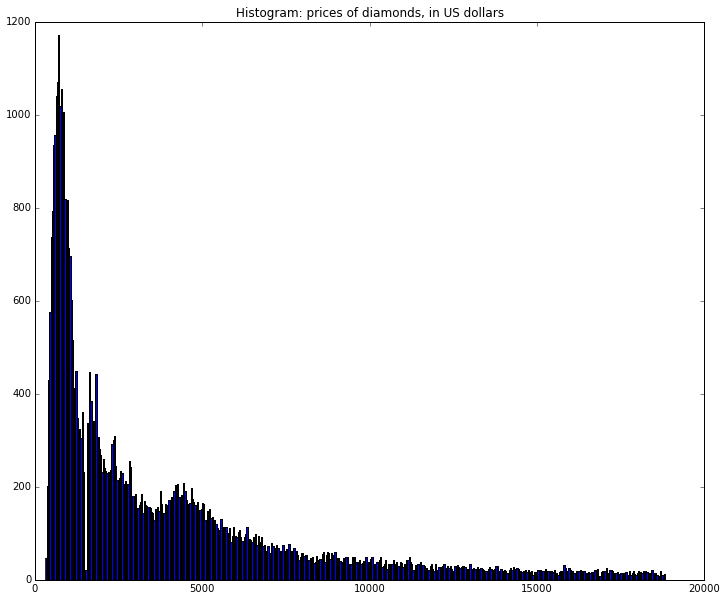

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0)

plt.hist( diamond_prices, bins=500 )
plt.title("Histogram: prices of diamonds, in US dollars")
plt.show()

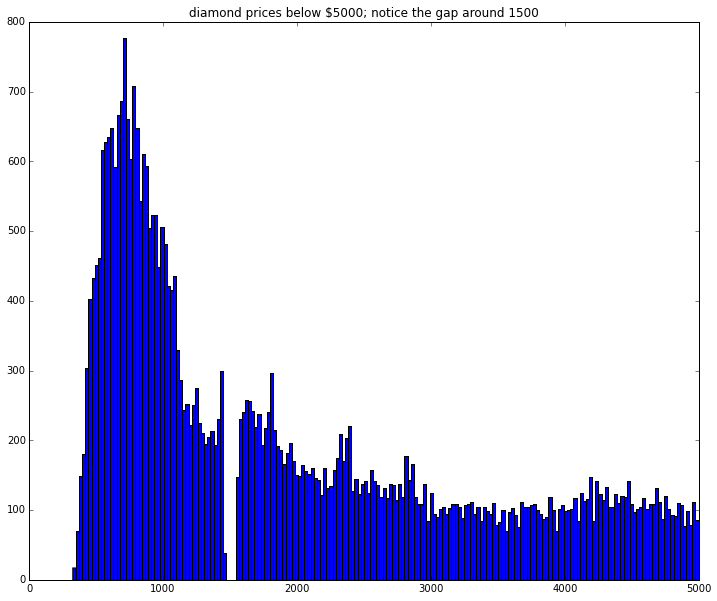

In [5]:
cheap_prices = diamond_prices[ (diamond_prices<5000) ]

plt.hist( cheap_prices, bins=200 )
plt.title("diamond prices below $5000; notice the gap around 1500")
plt.show()

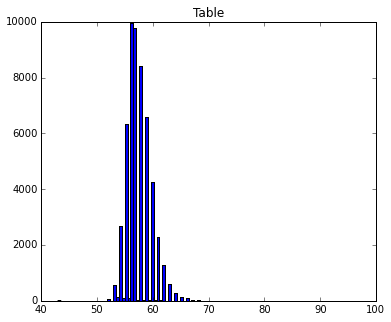

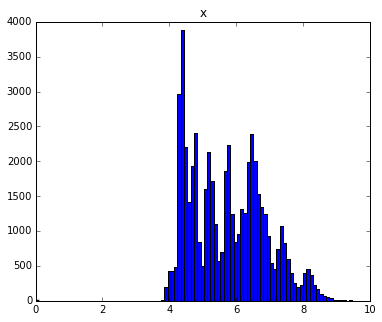

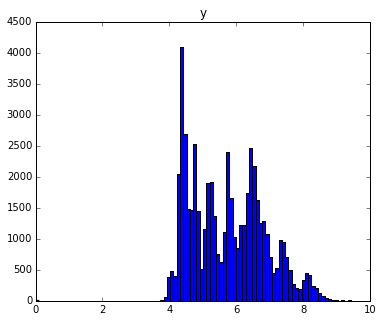

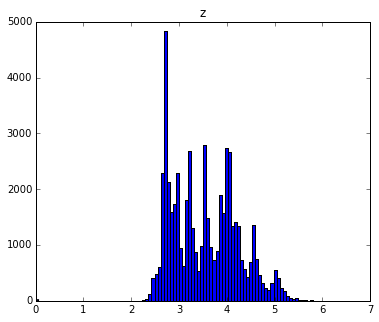

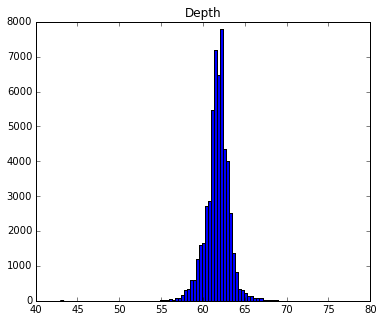

In [6]:
plt.rcParams['figure.figsize'] = (6.0, 5.0)

for ColName in ['Table','x','y','z','Depth']:  ### Numeric columns
    ColValues = Diamonds[[ColName]].values
    plt.hist( ColValues, bins=100 )
    plt.title( ColName )
    plt.show()

#Rough Histograms of Values in the other Columns

In [7]:
%load_ext rpy2.ipython

In [8]:
%%R

not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("tabplot")) install.packages("tabplot")
library(tabplot)


Loading required package: ffbase
Loading required package: ff
Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: 'bit'

The following object is masked from 'package:base':

    xor

Attaching package ff
- getOption("fftempdir")=="/var/folders/j7/tm2q9d2x6l32yr968jyh6ncw0000gn/T//Rtmp2YxZiG"

- getOption("ffextension")=="ff"

- getOption("ffdrop")==TRUE

- getOption("fffinonexit")==TRUE

- getOption("ffpagesize")==65536

- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes

- getOption("ffbatchbytes")==16777216 -- consider a different value for tuning your system

- getOption("ffmaxbytes")==536870912 -- consider a different value for tuning your s

In [9]:
%%R -i Diamonds

Diamonds[,c(1,5:10)] = data.matrix(Diamonds[,c(1,5:10)])  # force numeric
Diamonds = data.frame(Diamonds)  #  coerce to R format


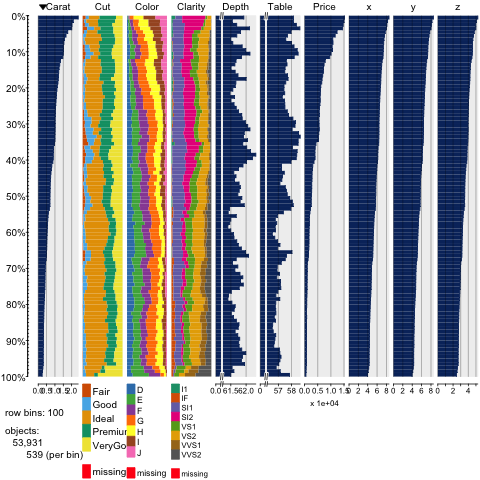

In [16]:
%%R

tableplot(Diamonds)

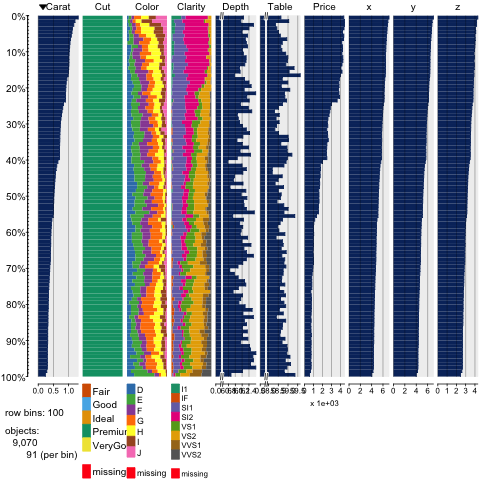

In [19]:
%%R

tableplot( Diamonds, subset = (Price < 5000) & Cut == "Premium" )


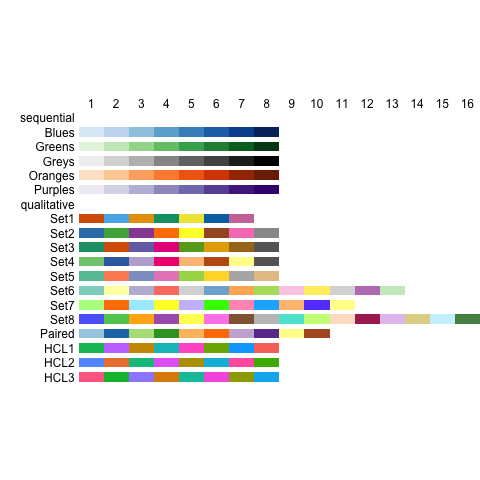

In [21]:
%%R

tablePalettes()  # color palettes that can be used for controlling display

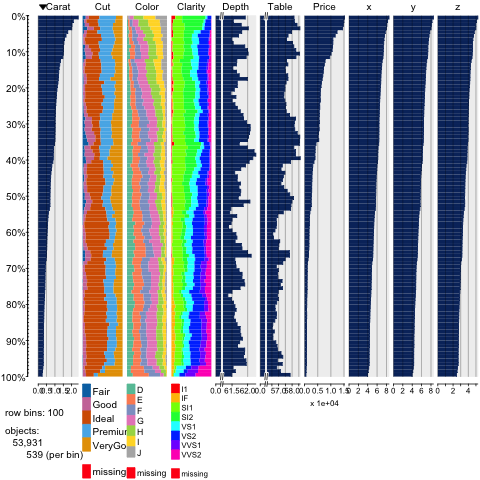

In [22]:
%%R

tableplot(Diamonds, pals = list(Cut = "Set1(6)",  # use special palettes
                                Color = "Set5",
                                Clarity = rainbow(8)))

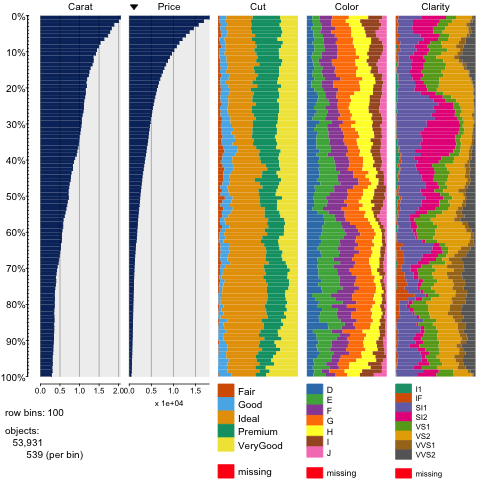

In [23]:
%%R

tableplot( Diamonds,
           select = c(Carat, Price, Cut, Color, Clarity),
           sortCol = Price )

# show results sorted by price

For more about tableplot() and the tabplot package, see:
<a href="http://cran.r-project.org/web/packages/tabplot">http://cran.r-project.org/web/packages/tabplot</a>
and
<a href="http://cran.r-project.org/web/packages/tabplot/vignettes/tabplot-vignette.html">http://cran.r-project.org/web/packages/tabplot/vignettes/tabplot-vignette.html</a>

In [ ]:
%%R

## if (not.installed("tabplotd3")) install.packages("tabplotd3")
## library(tabplotd3)
## 
## # an extension of tabplot:  interactive tabplot + d3.js
## 
## itabplot(Diamonds)

#What your program's output should look like

Your program should output lines consisting of 0s and 1s for the prediction labels for the test set, like:
<pre>
0
0
1
...
1
</pre>

##Example of how to format your output correctly for Mooshak

In [ ]:
# you can use the following code to generate output that is acceptable by Mooshak:

# generate the test labels
price_predictions = my_incredible_model.predict(x_test)                    

output_str = "\n".join(map(str, price_predictions.astype(int))) 

# You might want to specify the exact path to output your text file
# Say, "C:\\cs249\\output_label.txt" for Windows users.
f = open('output_label.txt', 'w') 

f.write(output_str);
f.close()

# Then submit the .txt file to Mooshak